In [ ]:
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import normalize

lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
no_of_sample, height, width = lfw_people.images.shape
images = []
for i in range(len(lfw_people.images)):
  if lfw_people.target_names[lfw_people.target[i]] == "Luiz Inacio Lula da Silva":
    images.append(lfw_people.data[i])

N = height * width
learningRate = 0.0001
tolerance = 1e-8

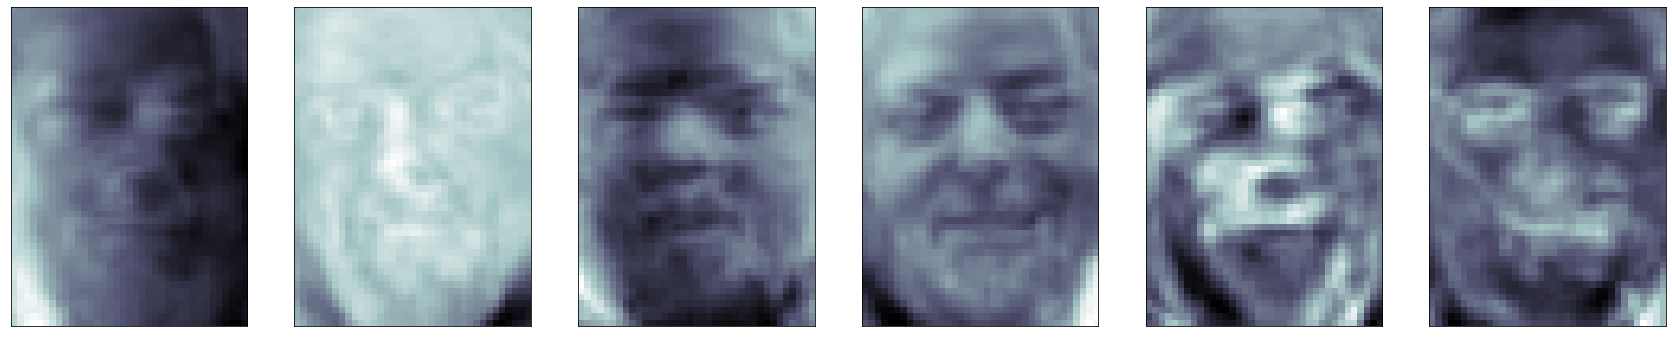

In [ ]:
pca = decomposition.PCA(n_components=6)
pca.fit(normalize(images))
fig = plt.figure(figsize=(height, width))
for i in range(6):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((height, width)), cmap=plt.cm.bone)

In [ ]:
N = height * width
def Oji(datas):
  w_oja = np.random.normal(scale=0.25, size=(N, 1))
  prev_w_oja = np.ones((N,1))
  while np.linalg.norm(w_oja - prev_w_oja) > tolerance:
    prev_w_oja = w_oja.copy()
    ys = np.dot(datas, w_oja)
    w_oja += learningRate * np.sum(ys * datas - np.square(ys) * w_oja.T, axis=0).reshape((N,1))
  return w_oja

In [ ]:
def Oji_output(image, components):
  output = np.zeros(N)
  for component in components:
    component = component.reshape(N).copy()
    output += component * np.dot(component, image) / np.dot(component, component)
  return output

In [ ]:
input_images = normalize(images.copy())
out_comp = []
for i in range(6):
  component = Oji(input_images)
  out_comp.append(component.copy())
  input_images -= component.T * np.dot(input_images, component) / np.dot(component.T, component)
  input_images = normalize(input_images.copy())

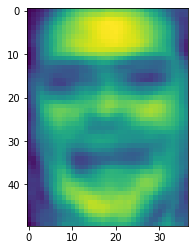

In [ ]:
plt.imshow(pca.mean_.reshape((height, width)))

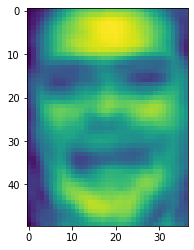

In [ ]:
plt.imshow(out_comp[0].reshape((height, width)))

**Wynikowe składowe**

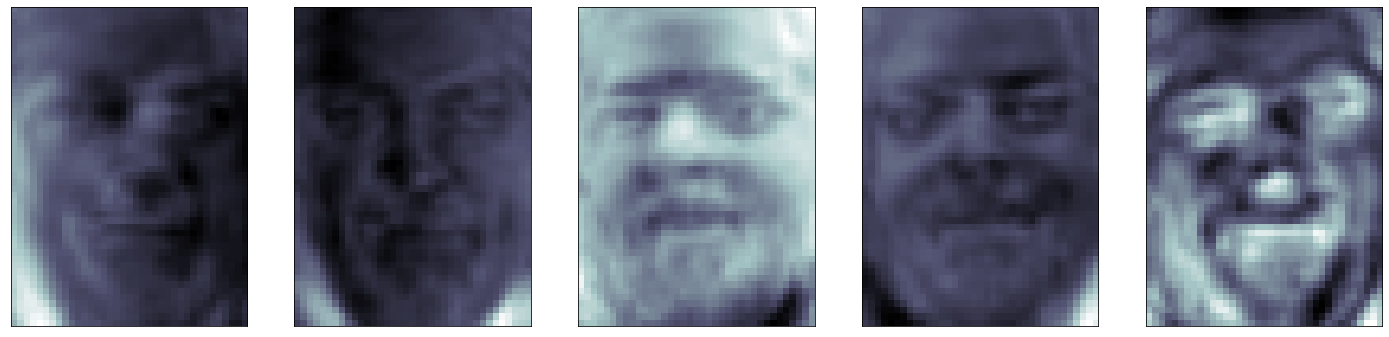

In [ ]:
fig = plt.figure(figsize=(height, width))
for i in range(1, 6):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(out_comp[i].reshape((height, width)), cmap=plt.cm.bone)

**Wynikowe obrazki na podstawie skladowych**

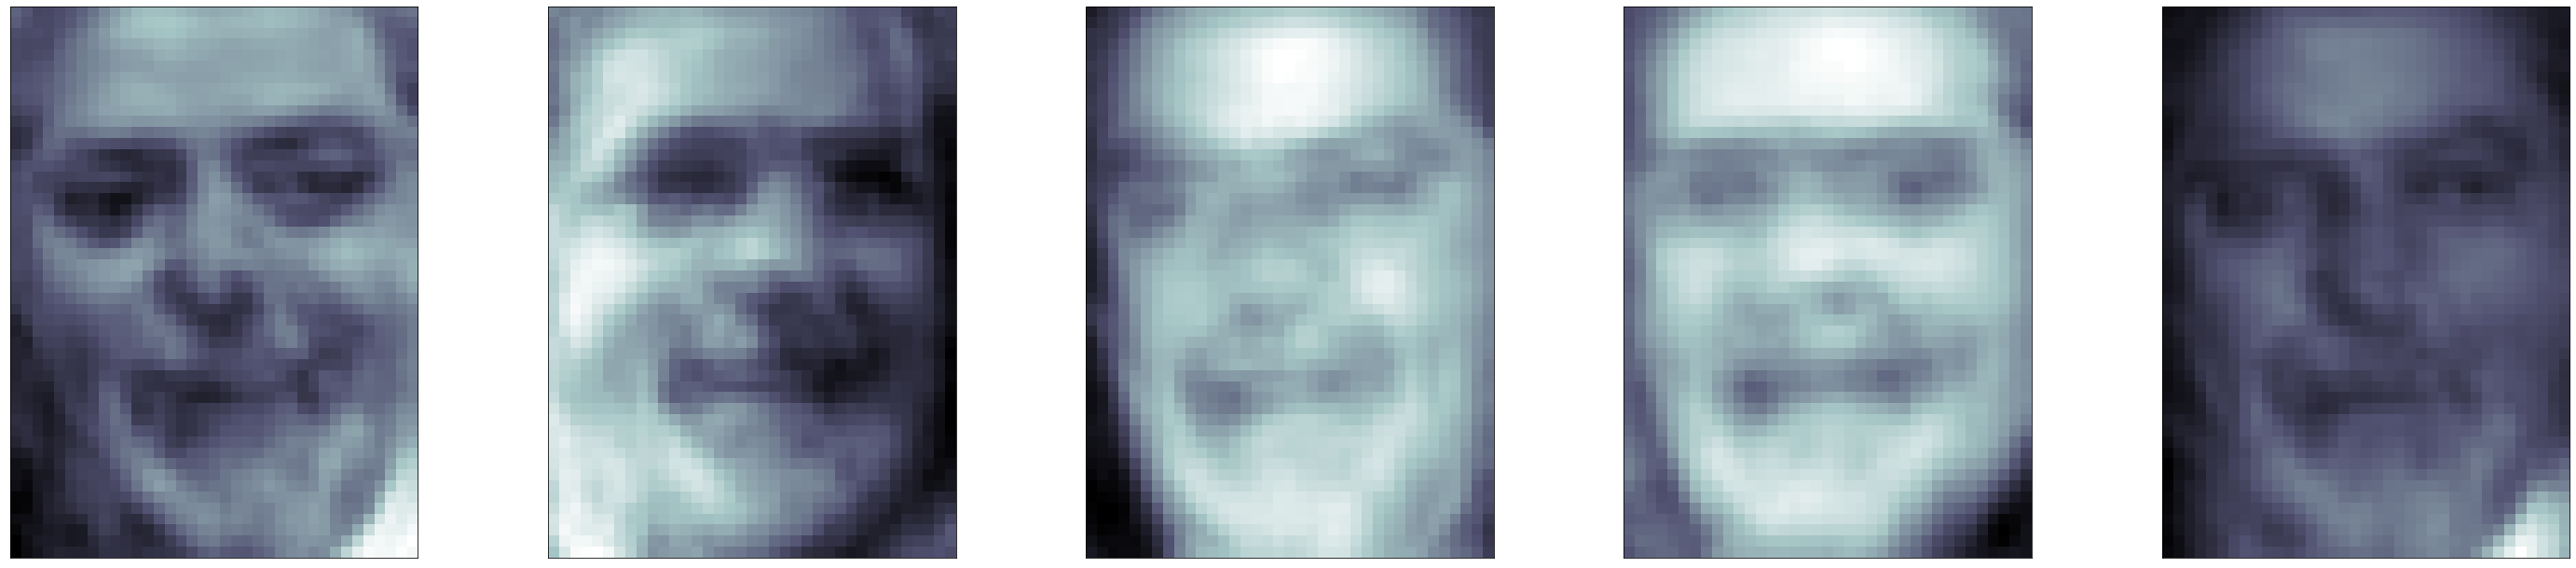

In [ ]:
fig = plt.figure(figsize=(height, width))
for i in range(5):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(Oji_output(images[i], out_comp).reshape((height, width)), cmap=plt.cm.bone)

**Podstawowe obrazki**

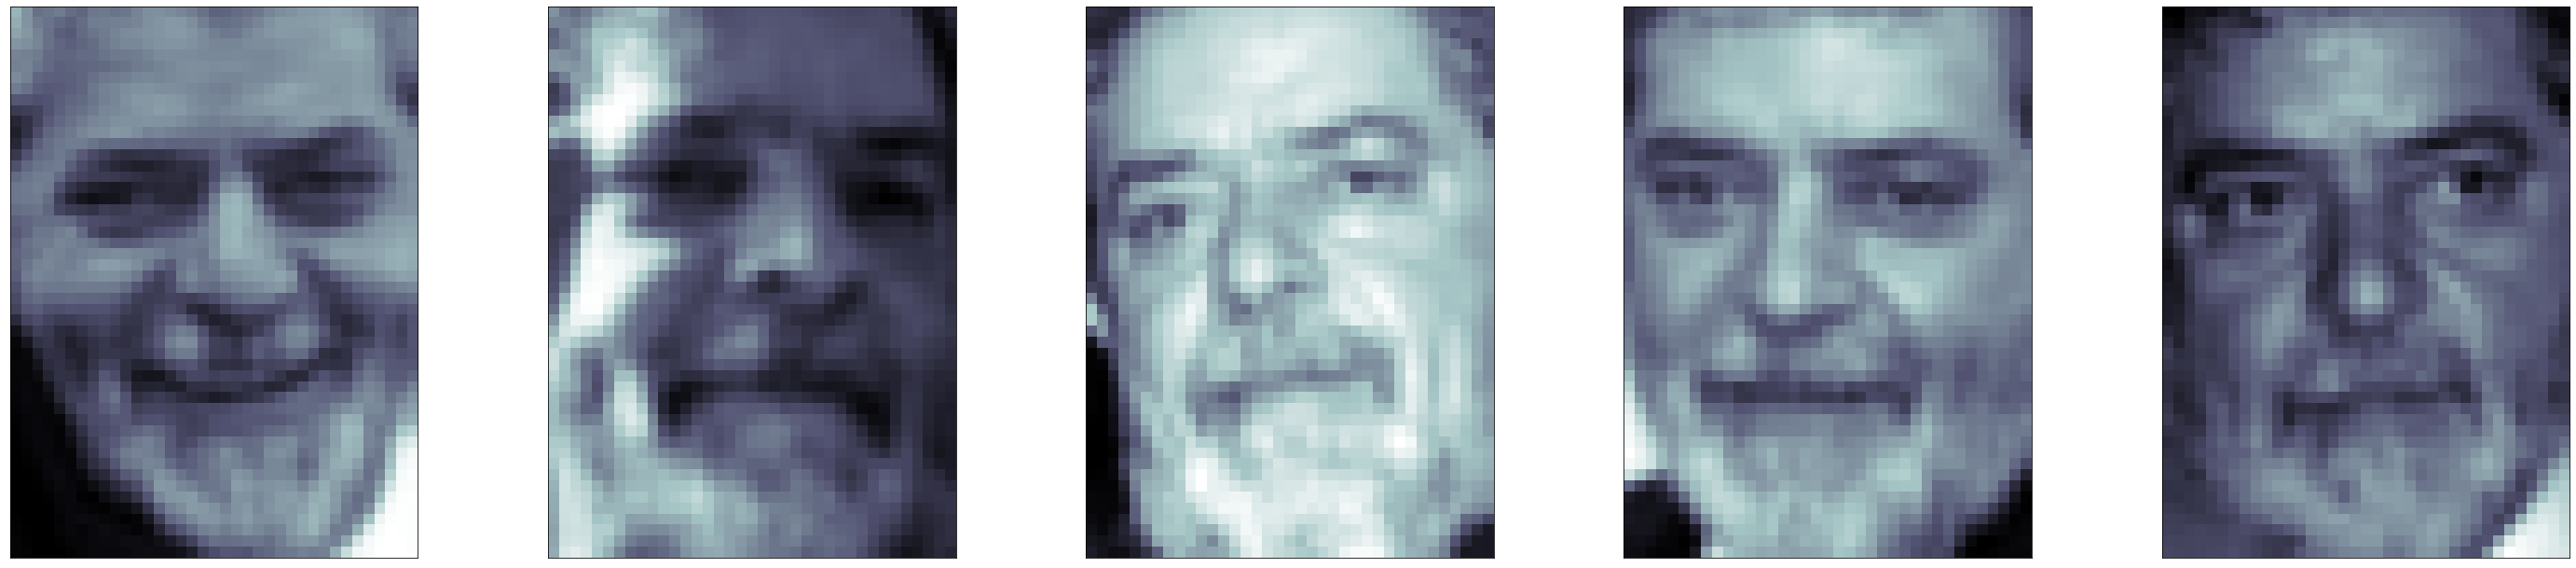

In [ ]:
fig = plt.figure(figsize=(height, width))
for i in range(5):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].reshape((height, width)), cmap=plt.cm.bone)